In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import math
import pandas as pd
# to limit the printout
%precision 4
np.set_printoptions(suppress=True)

### Exercise 1

In [2]:
N = 5000
x1 = np.random.normal(0.0,1.0,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1+x2
x = np.vstack((np.vstack((x1,x2)),x3))
c = np.cov(x)

In [3]:
#find eigenvalues 1st method
l, V = np.linalg.eig(c)
#find eigenvalues 2nd method --> keep this, they are already sorted
U, spectrum, Vt = np.linalg.svd(x)
l_svd = (spectrum**2)/(N-1)
print("Eigenvalues:\n", l_svd)
print("Orthogonal matrix:\n", U)
print("PCA Percentages:\n",l_svd/np.sum(l_svd))

Eigenvalues:
 [26.7156  1.97    0.    ]
Orthogonal matrix:
 [[-0.115   0.5658 -0.8165]
 [-0.578  -0.7066 -0.4082]
 [-0.8079  0.425   0.4082]]
PCA Percentages:
 [0.9313 0.0687 0.    ]


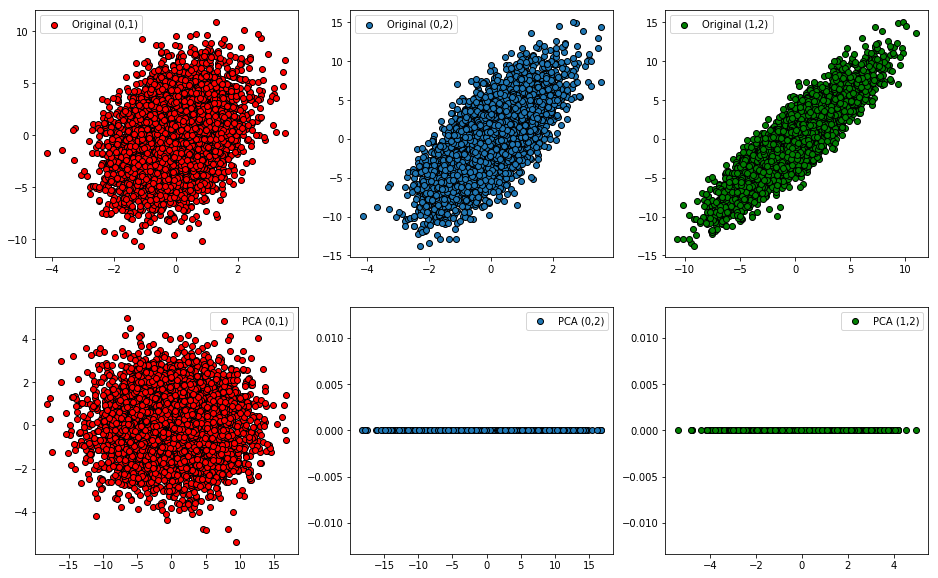

In [4]:
y = np.matmul(U.T,x)
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 10))
ax1.scatter(x[0,:], x[1,:], color='r', label='Original (0,1)', edgecolor='black')
ax2.scatter(x[0,:], x[2,:], label='Original (0,2)',edgecolor='black')
ax3.scatter(x[1,:], x[2,:], color='g', label='Original (1,2)',edgecolor='black')
ax4.scatter(y[0,:], y[1,:], color='r', label='PCA (0,1)',edgecolor='black')
ax5.scatter(y[0,:], y[2,:], label='PCA (0,2)',edgecolor='black')
ax6.scatter(y[1,:], y[2,:], color='g', label='PCA (1,2)',edgecolor='black')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
plt.show()

### Exercise 2

In [5]:
N = 5000
noise = np.random.normal(0,1/50,(10,N))
x = np.vstack((x,noise))
c = np.cov(x)

In [6]:
#find eigenvalues 1st method
l, V = np.linalg.eig(c)
#find eigenvalues 2nd method --> keep this, they are already sorted
U, spectrum, Vt = np.linalg.svd(c)
percs = spectrum/np.sum(spectrum)
print("Eigenvalues:\n", spectrum)
#print("Orthogonal matrix:\n", U)
print("PCA Percentages:\n",spectrum/np.sum(spectrum))

Eigenvalues:
 [26.711   1.9699  0.0004  0.0004  0.0004  0.0004  0.0004  0.0004  0.0004
  0.0004  0.0004  0.0004  0.    ]
PCA Percentages:
 [0.9312 0.0687 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    ]


### Exercise 3

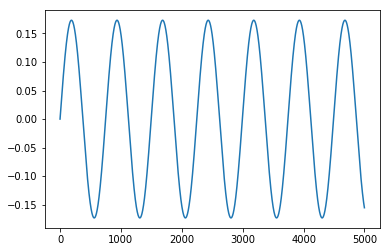

In [7]:
w0 = np.random.rand()*10
tau = 0.001
N = 5000
#v = np.zeros(N)
x0 = np.random.rand()*0.5
#v[0] = 0
#for i in range(N-1):
#    a_i = -w0*w0*x[i]
#   v[i+1]=v[i]+a_i*tau
#   x[i+1]=x[i]+v[i]*tau + 0.5*tau*tau*a_i
t=np.arange(0,N)*tau
x=x0*np.sin(w0*t)
plt.plot(x)
plt.show()

In [8]:
y = np.random.randn(N)/50
z = np.zeros(N)
r = np.vstack((np.vstack((x,y)),z))

#this is for the memes
def rotationMatrix(theta,axis):
    R = np.zeros((3,3))
    c = math.cos(theta)
    s = math.sin(theta)
    R[axis,axis]=1
    i1 = (axis-1)%3
    i2 = (axis+1)%3
    R[i1,i1]=c
    R[i2,i2]=c
    if i1>i2:
        R[i1,i2]=s
        R[i2,i1]=-s
    else:
        R[i1,i2]=-s
        R[i2,i1]=s
    return R

In [9]:
n = 15
theta = np.random.rand(n)*2*math.pi
phi = np.random.rand(n)*math.pi
cams = np.array([np.sin(phi)*np.cos(theta), np.sin(phi)*np.sin(theta),np.cos(phi)]).T
print("Camera positions on the unit sphere\n",cams)

Camera positions on the unit sphere
 [[-0.3939  0.014  -0.919 ]
 [ 0.4103 -0.2979  0.8619]
 [ 0.6102  0.1569 -0.7766]
 [-0.1733  0.544   0.821 ]
 [ 0.3377  0.6158  0.7119]
 [-0.0323 -0.4487  0.8931]
 [-0.4802  0.0053  0.8771]
 [ 0.3818  0.85    0.363 ]
 [ 0.0476  0.0836  0.9954]
 [ 0.9055 -0.3847  0.1788]
 [-0.044  -0.8342 -0.5497]
 [-0.979  -0.0738  0.1902]
 [-0.2503  0.3892  0.8865]
 [ 0.1952 -0.3324  0.9227]
 [-0.0608  0.5231  0.8501]]


In [10]:
cAmps = np.matmul(cams,r)

Eigenvalues:
 [0.0461 0.0013 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.    ]
Keeping the first component explains: 0.9735429114455654 % of the data


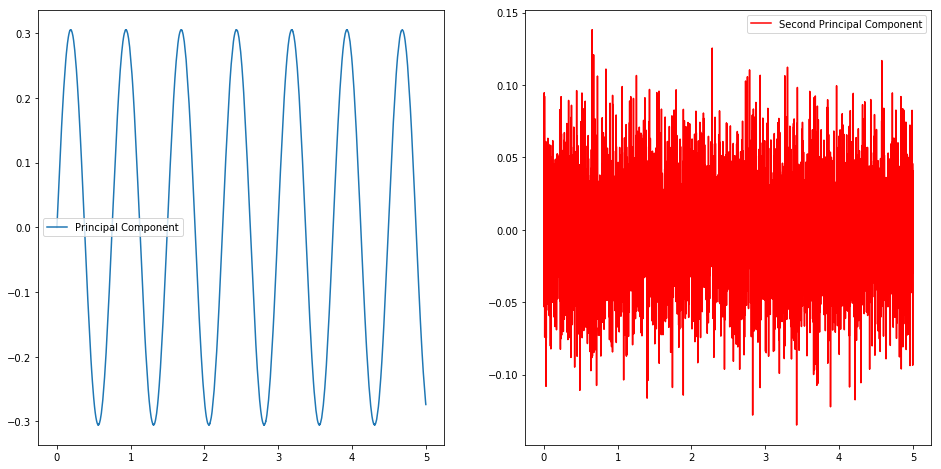

In [11]:
U,spectrum,Vt=np.linalg.svd(cAmps)
l_svd = spectrum**2/(N-1)
pcaCams= np.matmul(U.T, cAmps)
print("Eigenvalues:\n", l_svd)
print("Keeping the first component explains:", (l_svd[0])/np.sum(l_svd), "% of the data")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.plot(t, pcaCams[0,:], label='Principal Component')
ax1.legend()
ax2.plot(t, pcaCams[1,:], label='Second Principal Component', color='red')
ax2.legend()
plt.show()

### Esercizio 4

In [12]:
data = pd.read_csv("magic04.data", names=["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "fClass"])

In [13]:
data.loc[data['fClass']=='h', 'fClass']=0
data.loc[data['fClass']=='g', 'fClass']=1

In [ ]:
N = len(data)
U,spectrum,Vt=np.linalg.svd(data)
l_svd = spectrum**2/(N-1)

In [ ]:
pcaData = np.dot(U.T, data)
percs = l_svd/np.sum(l_svd)
print("Percentages on components:\n", percs)
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(10,8))
ax1.scatter(data.values[:,0], data.values[:,1], label='data (0,1)', color='r')
ax1.legend()
ax2.scatter(data.values[:,0], data.values[:,2],label='data (0,2)')
ax2.legend()
ax3.scatter(data.values[:,1], data.values[:,2],label='data (1,2)', color='g')
ax3.legend()
ax4.scatter(pcaData[:,0], pcaData[:,1], label='PC (0,1)', color='r')
ax4.legend()
ax5.scatter(pcaData[:,0], pcaData[:,2],label='PC (0,2)')
ax5.legend()
ax6.scatter(pcaData[:,1], pcaData[:,2],label='PC (1,2)', color='g')
ax6.legend()
plt.show()